<a href="https://colab.research.google.com/github/meshrifalruily/Machine-learning-projects/blob/main/supermarket_prediction_linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'store-sales-time-series-forecasting:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F29781%2F2887556%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240425%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240425T145109Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D46f9bf6b91f773ed33c448b35c29459dfb4ee6d305660fc33b558ab8a313e12ceaee12dcf69dddc812cae25c70a21e5596caa79c2220cc3d84a70d63f2debd0bebb8635fa69ffbed870829f5ce4da4b1abade430c5e0c7fe590d683a973c7567580d024523ba6ef5330a96b209fd71506c3c93d0c3dfa4557d791f53c7f083d95ce79c7c3b0ad34abee54b94e0671e52ab5dcad24ad8ccb48b3ac12c44978f992b16cbe3223e81ba04657578ea669cc1bb5db236bef47903030cb70306b3ead39d11e7575c12b8d77ea6ce371fe06600795b6e118edfb0e3bf787a329ddbed3e79f10a4c4519caaf2bf9888b6271140e1c707380bbb7080e9b8561767e12efd0,supermarket-sales:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F205965%2F451952%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240425%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240425T145109Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D572a4d3cfb140b82133ef35f85a011e38575f8de6e5b1c892691b2c9b962e1891b9332f6855202a81456d06dffdd7a8f01021625fe2a5ce5c617103108988e7c11820e236261d37825414a49dac524db1d9064168abaa05ac97aeaf6d5b3ea6ec2aa31265639203f93621dcf08c83ba6b9c73837106de97a894cce0bc05dacdb437be7fa22ac5e2f9b255096b9d32dcad7c5158bfad211c3dc28d9f10d0eec13802d15683acd919b0d2d6125ab576c4549c2d6722abcd5c558594238e6d57b654f158c60ef5ab8e88dfb805ca55d6f33e6a2efe90131eced7ea749603cf7fb02f2b185180a9ca7e9bf9b8695263ad2764b0c8d37ced916d55d8be890a622ea11,sales-forecasting:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F835308%2F1480443%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240425%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240425T145109Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7561ca2f699438db8a1f0be4707b69dddd2197e05225be690f1dc6e45c336d106d68c1bd12bbfe5193b97a8c1872c1d0eacc52dd587ba82226ef35e2275fcd6b02908fd304ad20abc77f2395cdfe90df872428b98c2cb734d055409eb048c132832d296a6ea0dfbd3fe2f7f986f2add7864bd68dbb2c94558ee8cbeb8dd96b4937854cfcd6d6a13deb855a957971f37703b92f19d78b86444f5b69a4b2b57c046bde2593fc112712103ff38c24c39d843bdd41d2b69612112a9a24a8120adad2527a5cfb03c8b6e305bb6353f0ab5f6052881027d2ea887210e6426a437120cdf30d73861829f09efec7668f143d0a1bbd04943a45817c1ac1520e5cf3ca00e3,walmart-sales:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4438189%2F7619692%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240425%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240425T145109Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D571010757410d9088f5a995c0b805fbf7ec512abfbbaf21edef89c4594d34a7fe7b68b41f84d903460cd717636e3ba93df0528a34afa1bfc31c47e77821458e35f99234632be9141232f059e38251b2a632b124d702f3b3f3ece2ae9457443736fa8c9c034b4eab20a91b02836c872ab1a27e60399ecdfb0abea2912796c6a7c99b4171109bf6a01445ccea32e46cc5692c7819e7c6c9c2e86817620333bdea110a26e75128c5e2ef06b31521a3d855b47b91194cba555323e55c8af26c66880e5d246dba3fc867779c4b5b20e1bfc687a5e6238a1fa5ba6f1ed3b2298009104ac904b86c2db7c43c9b36d1fa172ef5df9e344ca527b2b4bcc3b75a9f51a6657,vehicle-sales-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4476093%2F7673611%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240425%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240425T145109Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D455e13640cd7dd167fecb1a101cb317640d1713a795efe765acf0ca68a24098e041bb3840c23e2e3b9d1627b08c422966b196488fd516390091eb2d8e1e76474eb377e8016fc7663ebb860f7c1460a3adf6f38b215edc22e31ab1d9c340bbf49b844acd90b19fb9d335644edc1cbdbef05dae8ab34004647b689d7a0ee67d5367d72e5d779d148720bd4ef3bb3d9bdde87797031141a087be7a8b2920cd8f093ea4e94c027d648e675083d08a0eaeac2cdc22e3df26dab03c1464e97c58886e8688a0763233637f87feace34551414756ce710ad15c0fbf59972275d997be854a8e4240f0409bd18043f5cf2103b5bdd9c06c1f4adfec55bcc9f6cb46f087325'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 22416355 bytes downloaded
Downloaded and uncompressed: store-sales-time-series-forecasting
[==================================================] 36801 bytes downloaded
Downloaded and uncompressed: supermarket-sales
[==================================================] 491942 bytes downloaded
Downloaded and uncompressed: sales-forecasting
[==================================================] 125107 bytes downloaded
Downloaded and uncompressed: walmart-sales
[==================================================] 19753181 bytes downloaded
Downloaded and uncompressed: vehicle-sales-data
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
data = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')
data.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [ ]:
data.shape

(1000, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head(2)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [ ]:
data = data.drop(['invoice_id', 'date', 'time'], axis=1)

In [ ]:
data.head(2)

,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,cogs,gross_margin_percentage,gross_income,rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6


In [ ]:
def explore_cat(col):
  return data[col].value_counts()

for col in data.select_dtypes('object').columns:
  print(explore_cat(col))
  print('='*50)

branch
A    340
B    332
C    328
Name: count, dtype: int64
city
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64
customer_type
Member    501
Normal    499
Name: count, dtype: int64
gender
Female    501
Male      499
Name: count, dtype: int64
product_line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64
payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


In [ ]:
data.duplicated().sum()

0

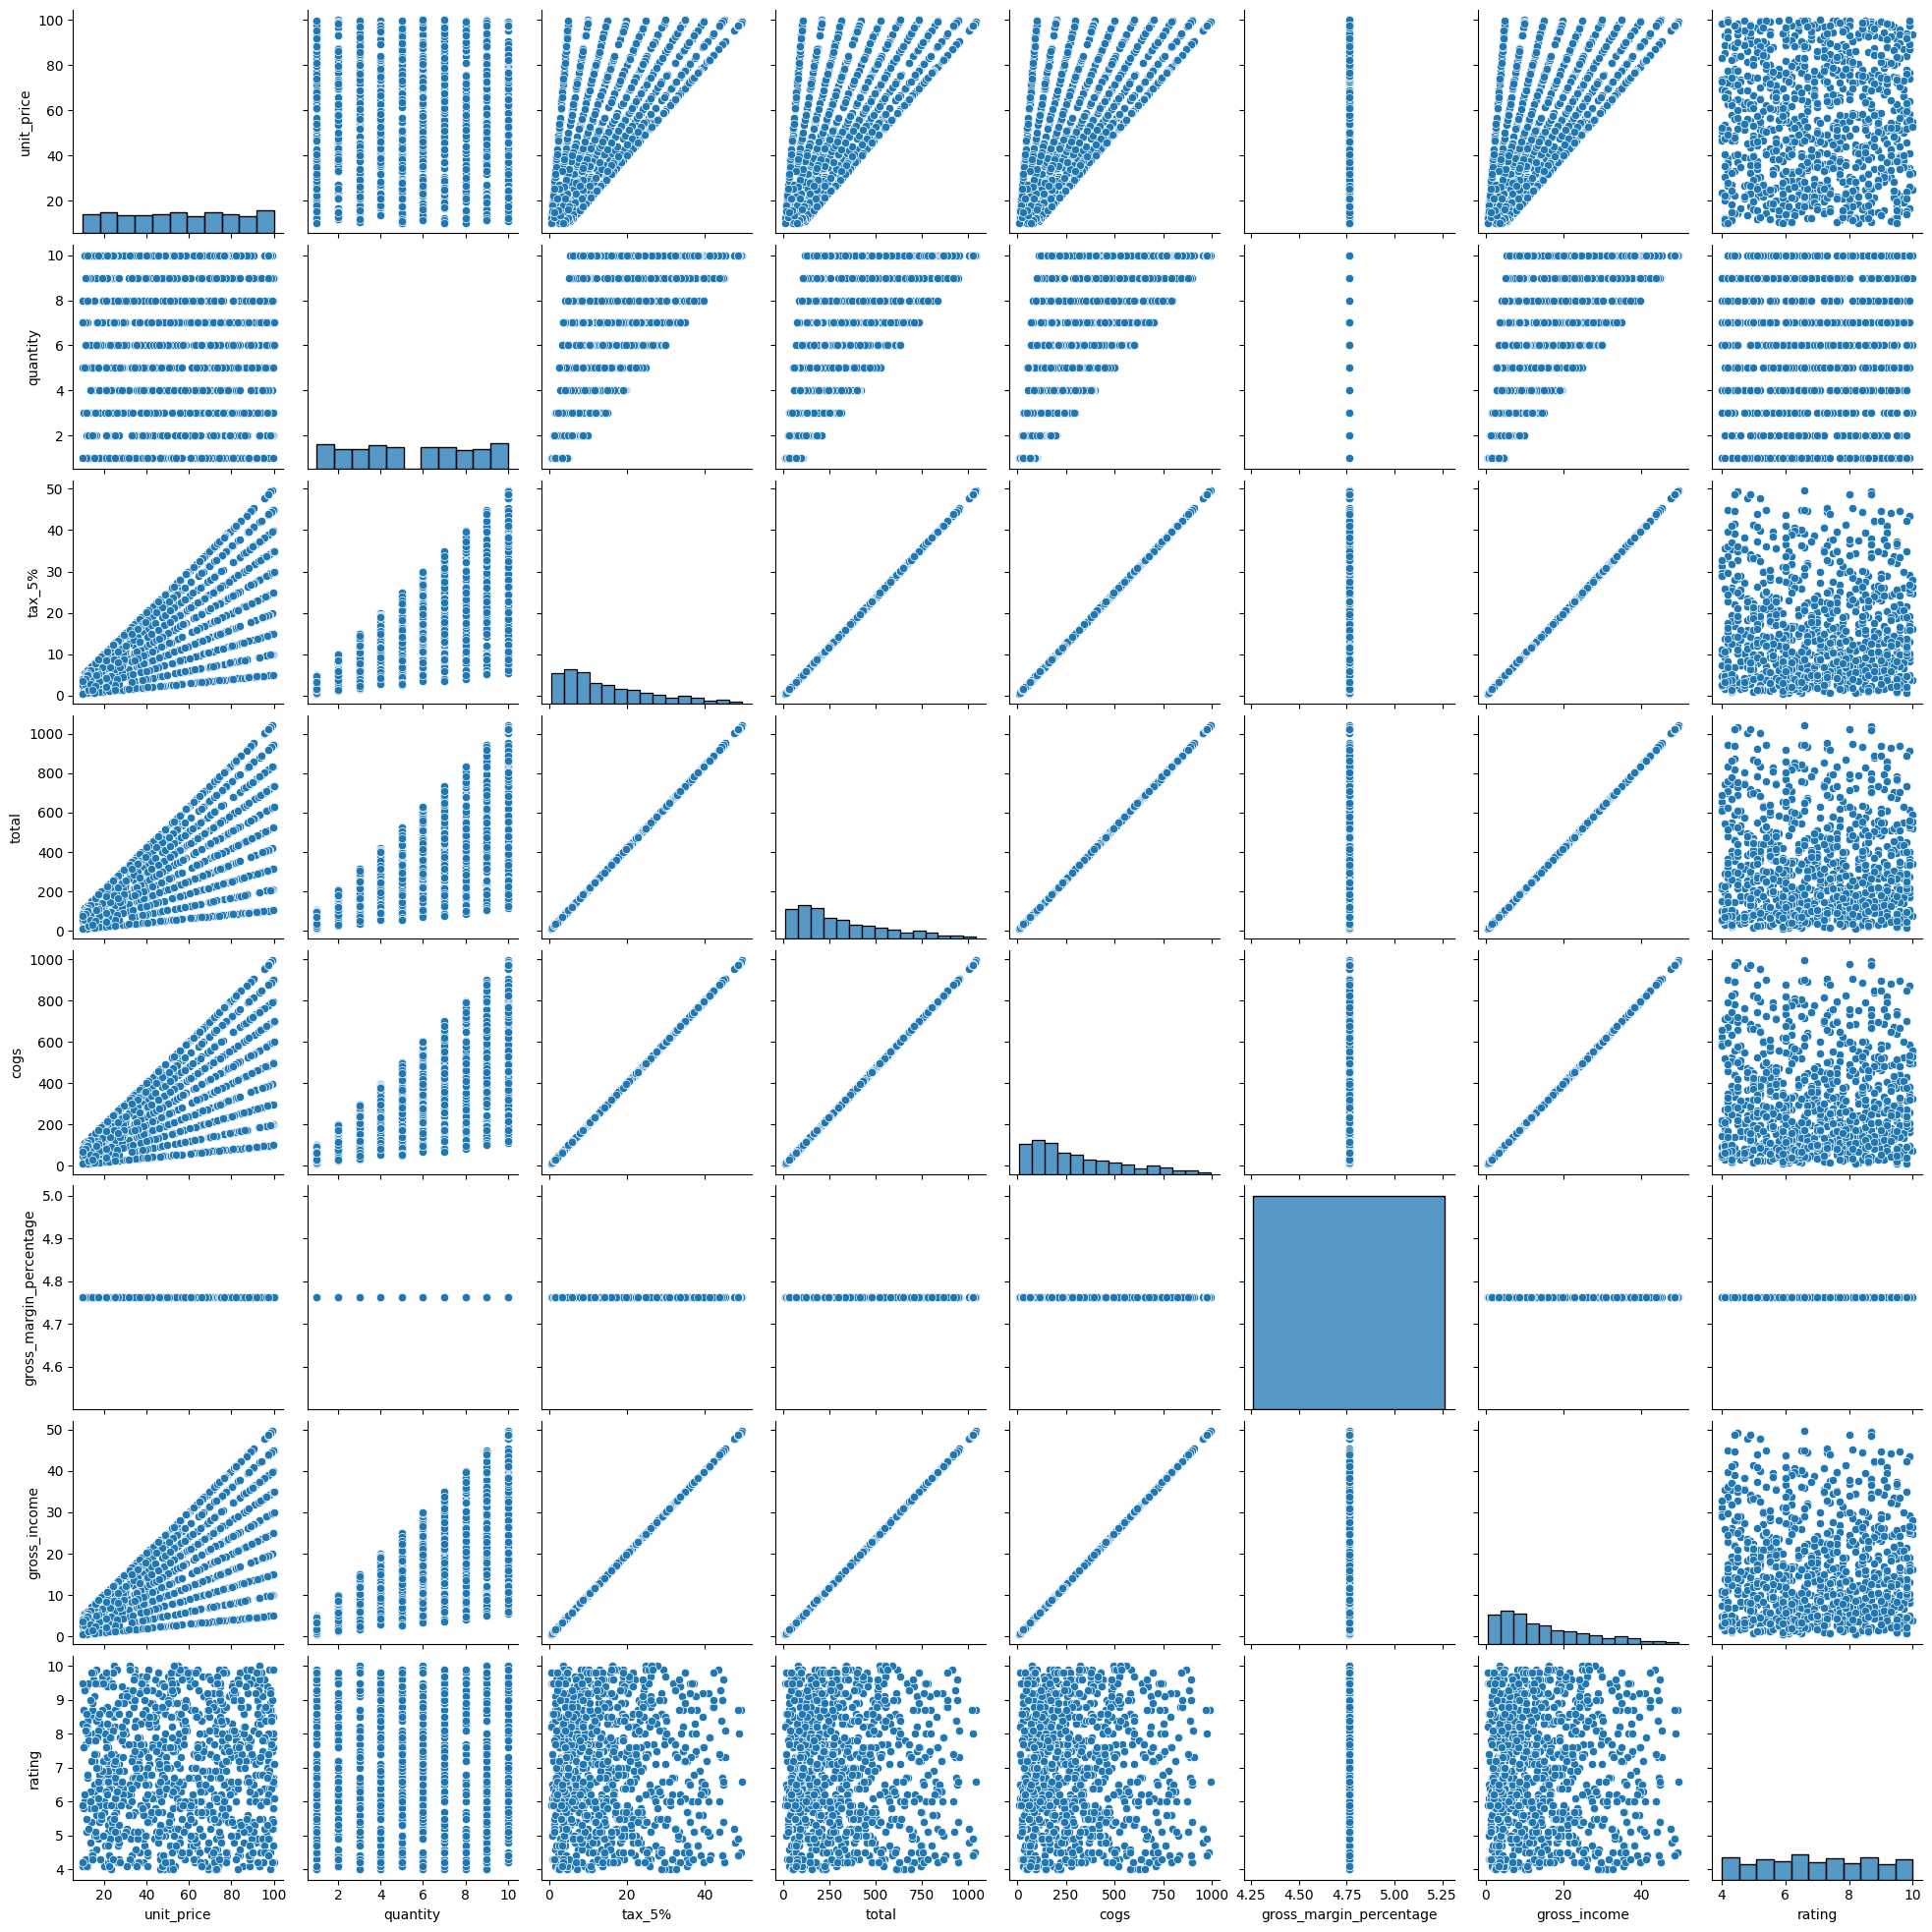

In [ ]:
import seaborn as sns

sns.pairplot(data)

In [ ]:
text_columns = data.select_dtypes('object')
text_columns

,branch,city,customer_type,gender,product_line,payment
0,A,Yangon,Member,Female,Health and beauty,Ewallet
1,C,Naypyitaw,Normal,Female,Electronic accessories,Cash
2,A,Yangon,Normal,Male,Home and lifestyle,Credit card
3,A,Yangon,Member,Male,Health and beauty,Ewallet
4,A,Yangon,Normal,Male,Sports and travel,Ewallet
...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,Ewallet
996,B,Mandalay,Normal,Female,Home and lifestyle,Ewallet
997,A,Yangon,Member,Male,Food and beverages,Cash
998,A,Yangon,Normal,Male,Home and lifestyle,Cash


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe = OneHotEncoder(sparse_output= False).set_output(transform = 'pandas')
text_col_encoding = ohe.fit_transform(text_columns)
text_col_encoding.shape

(1000, 19)

In [ ]:
num_cols = data.select_dtypes('number')
num_cols.head()

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3


In [ ]:
normalizer = StandardScaler().set_output(transform= 'pandas')

normlized_column = normalizer.fit_transform(num_cols.drop('cogs', axis=1))
normlized_column.head(2)

,unit_price,quantity,tax_5%,total,gross_margin_percentage,gross_income,rating
0,0.718160,0.50993,0.919607,0.919607,0.0,0.919607,1.238443
1,-1.525303,-0.17454,-0.987730,-0.987730,0.0,-0.987730,1.529527


In [ ]:
pd.set_option('display.max_columns', 30)

In [ ]:

features = pd.concat([text_col_encoding, normlized_column ], axis =1)
features.head(2)

,branch_A,branch_B,branch_C,city_Mandalay,city_Naypyitaw,city_Yangon,customer_type_Member,customer_type_Normal,gender_Female,gender_Male,product_line_Electronic accessories,product_line_Fashion accessories,product_line_Food and beverages,product_line_Health and beauty,product_line_Home and lifestyle,product_line_Sports and travel,payment_Cash,payment_Credit card,payment_Ewallet,unit_price,quantity,tax_5%,total,gross_margin_percentage,gross_income,rating
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.718160,0.50993,0.919607,0.919607,0.0,0.919607,1.238443
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.525303,-0.17454,-0.987730,-0.987730,0.0,-0.987730,1.529527


In [ ]:
target = data.cogs.values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle= True, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()

model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print('mae= ', mean_absolute_error(y_test, model.predict(X_test)))


1.0
1.0
mae=  2.5941027104181557e-13


In [ ]:
X_test.shape

(200, 26)

In [ ]:
y_predict = model.predict(X_test)

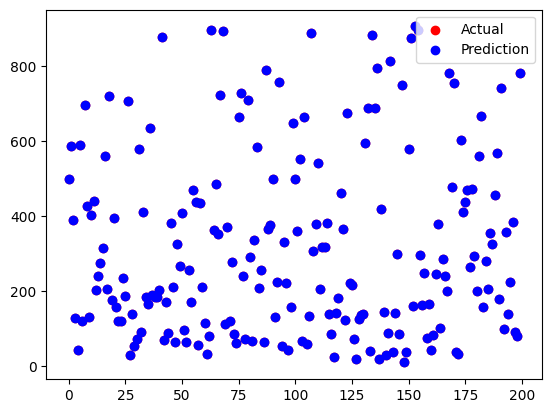

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x = range(0,200), y= y_test, c= 'r', label= 'Actual')
plt.scatter(x= range(0,200), y= y_predict, c= 'b', label= "Prediction")
plt.legend()
plt.show()

In [ ]:
result = pd.DataFrame({
    'actual': y_test,
    'prediction': y_predict
})

result

,actual,prediction
0,499.02,499.02
1,587.60,587.60
2,389.27,389.27
3,128.91,128.91
4,43.74,43.74
...,...,...
195,226.12,226.12
196,385.10,385.10
197,91.11,91.11
198,80.93,80.93


## Using Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

# seperate text columns from numeric columns

text_col = make_column_selector(dtype_include= 'object')
num_col = make_column_selector(dtype_include= 'number')

text_pipeline = Pipeline(steps=[

                                ('one_hot_encoding', OneHotEncoder(sparse_output=False, handle_unknown= 'ignore'))

])

num_pipeline = Pipeline(steps=[

                               ('scaler', StandardScaler())
])


transformer = ColumnTransformer([

                                 ('text', text_pipeline, text_col),
                                 ('numeric', num_pipeline, num_col)
]).set_output(transform='pandas')

features = data.drop('cogs', axis=1)
target = data.cogs.values
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle= True, random_state=42)


In [ ]:
model = Pipeline([

                  ('transform', transformer),
                  ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79736c106440>),
                                                 ('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79736c107d00>)])),
                ('regressor', LinearRegression())])

In [ ]:
preds = model.predict(X_test)

result = pd.DataFrame({

                       'prediction': preds,
                       'actual': y_test
})

result

,prediction,actual
0,499.02,499.02
1,587.60,587.60
2,389.27,389.27
3,128.91,128.91
4,43.74,43.74
...,...,...
195,226.12,226.12
196,385.10,385.10
197,91.11,91.11
198,80.93,80.93
